In [1]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [3]:
print(stopwords.words('english')) 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [4]:
df = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding = "ISO-8859-1")

In [5]:
df.shape

(1599999, 6)

In [6]:
df.head(5)

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [7]:
col_names = ['target', 'id', 'date', 'flag', 'user', 'text']
df = pd.read_csv("training.1600000.processed.noemoticon.csv",
                 names = col_names,
                 encoding = "ISO-8859-1")

In [8]:
df.shape

(1600000, 6)

In [9]:
df.head(5)

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [10]:
df.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

<Axes: >

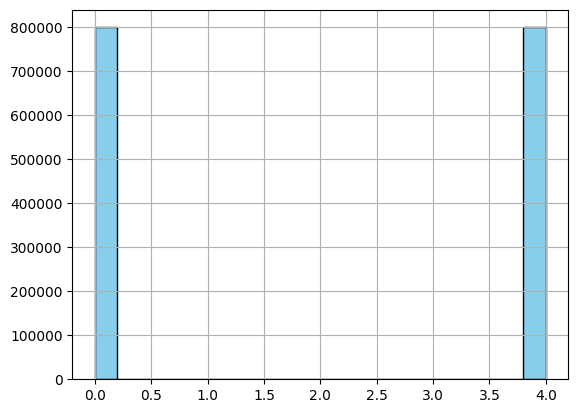

In [11]:
# checking the target distribution

df["target"].hist(bins=20, color='skyblue', edgecolor='black') 

In [12]:
# renaming the labels as 0 and 1 instead of 0 and 4

df.replace({'target':{4:1}}, inplace = True)

<Axes: >

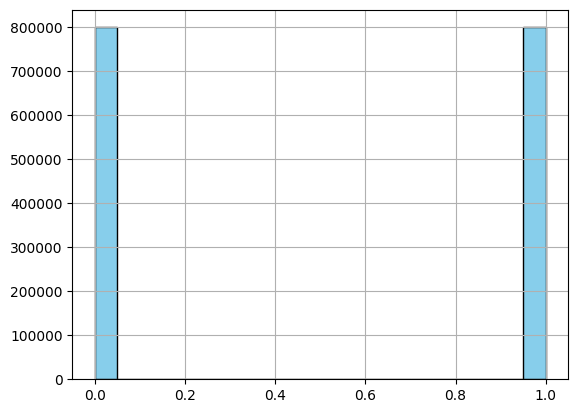

In [13]:
# checking the target distribution

df["target"].hist(bins=20, color='skyblue', edgecolor='black') 

In [14]:
port_stem = PorterStemmer()

In [15]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]', " ", content)   # the regular expression matches any pattern that is not a character
                                                          # (since negation ^ is used) and replaces those matched sequences 
                                                          # with empty space, thus all special characters and digits get 
                                                          # removed.
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if word not in stopwords.words('english')]   
                                                          # apply port_stem only on words not in the list of stop-words
    stemmed_content = " ".join(stemmed_content)
    
    return stemmed_content

In [16]:
df["stemmed_content"] = df["text"].apply(stemming)


In [17]:
df.head(5)

,target,id,date,flag,user,text,stemmed_content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see


In [18]:
X = df["stemmed_content"].values
y = df["target"].values

In [19]:
X

array(['switchfoot http twitpic com zl awww bummer shoulda got david carr third day',
       'upset updat facebook text might cri result school today also blah',
       'kenichan dive mani time ball manag save rest go bound', ...,
       'readi mojo makeov ask detail',
       'happi th birthday boo alll time tupac amaru shakur',
       'happi charitytuesday thenspcc sparkschar speakinguph h'],
      dtype=object)

In [20]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [22]:
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(1600000,) (1280000,) (320000,)
(1600000,) (1280000,) (320000,)


In [23]:
print(X_train)

['paisleypaisley lol get idea far advanc even june yet need third knitter summer group'
 'worst headach ever'
 'ewaniesciuszko sad wont see miss alreadi yeah perfect come back th' ...
 'got home meet talk endlessli one coolest guy ever met smile'
 'bought chocol bar quot win free bar quot label win either'
 'misecia said hope dm email sunday']


In [24]:
print(X_test)

['stm denali ye black red fav color realli want color def look awesom jare'
 'qu buy open hous weekend pm best valu one bedroom lic long island citi bd http tinyurl com pt nqd'
 'ginoandfran fran greet air okay hahahaha thank' ...
 'la brat follow also hope atleast get also wish get well soon'
 'feel like decent swell sinc last fall hope wave myrtl beach week either least golf'
 'relaxin busi day']


In [25]:
vectorizer = TfidfVectorizer()


X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


# The intuition is that the vectorizer will assign some numerical value to each word in the stemmed text based on its
# positive or negative influence. Example: Words like "happy" and "fine" will have a poitive impact and words like "sad"
# "angry" have a negative impact. Finally the ML model will see the influences of each word and judge the overall influence 
# of the sequence.

In [26]:
print(X_train)

  (0, 154767)	0.2697660704325824
  (0, 388138)	0.20555120011808467
  (0, 220296)	0.4301567790762487
  (0, 406297)	0.2978221095272138
  (0, 286478)	0.16123218610004275
  (0, 454381)	0.20169626473577718
  (0, 205794)	0.2414022906380175
  (0, 124524)	0.18318401951949756
  (0, 4832)	0.31707426786115905
  (0, 128605)	0.22108856600702775
  (0, 175252)	0.22407080547034602
  (0, 146067)	0.12929728405657018
  (0, 239679)	0.15130037108228483
  (0, 307108)	0.4620604881532448
  (1, 124611)	0.5113765148324884
  (1, 161801)	0.5778049407933611
  (1, 445870)	0.6361096685891185
  (2, 400192)	0.2722541116865256
  (2, 31063)	0.1936303169258752
  (2, 78861)	0.21039643874061958
  (2, 312657)	0.3154702974657607
  (2, 453420)	0.2347069337186747
  (2, 12436)	0.2529872032123258
  (2, 267649)	0.19309660201644555
  (2, 358186)	0.19837942712286838
  :	:
  (1279997, 120136)	0.5183864288132355
  (1279997, 80839)	0.4085075096529922
  (1279997, 262076)	0.3257051331036561
  (1279997, 372797)	0.3021907911926725
  (1279

In [27]:
print(X_test)

  (0, 453357)	0.1781708363247895
  (0, 435956)	0.14183025329879742
  (0, 384697)	0.3281164007446601
  (0, 335577)	0.22602158147814247
  (0, 334643)	0.14719329779308424
  (0, 240451)	0.15341308097014625
  (0, 189057)	0.31324918577405797
  (0, 129417)	0.25650960779862714
  (0, 97585)	0.4019235611854435
  (0, 96399)	0.255967788489452
  (0, 78636)	0.5158100011206617
  (0, 43712)	0.23562815302828183
  (0, 28874)	0.1778395103911245
  (1, 438137)	0.16390196841168053
  (1, 428475)	0.2850923429146983
  (1, 409742)	0.19539196331452124
  (1, 328541)	0.30370566878650734
  (1, 325414)	0.2832875855026037
  (1, 318909)	0.20246938925608493
  (1, 303003)	0.19949441578138133
  (1, 301683)	0.13212235134015302
  (1, 240223)	0.1674195650536303
  (1, 233854)	0.3852709938491561
  (1, 183279)	0.24586158827112847
  (1, 171245)	0.12468774856570086
  :	:
  (319997, 225096)	0.2933179603743362
  (319997, 169469)	0.19450444826456267
  (319997, 146067)	0.3148589224636577
  (319997, 135536)	0.2180996497753238
  (3199

In [28]:
from sklearn.ensemble import RandomForestClassifier  
from sklearn.linear_model import LogisticRegression

In [29]:
model = RandomForestClassifier(n_estimators= 10, criterion="entropy")  
model.fit(X_train, y_train) 

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [30]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)

print("Accuracy score on the Training Data: ", round(training_data_accuracy*100, 3), "%")

Accuracy score on the Training Data:  98.529 %


In [31]:
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(y_test, X_test_prediction)

print("Accuracy score on the Testing Data: ", round(testing_data_accuracy*100, 3), "%")

Accuracy score on the Testing Data:  74.538 %


In [32]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [33]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)

print("Accuracy score on the Training Data: ", round(training_data_accuracy*100, 3), "%")

Accuracy score on the Training Data:  81.019 %


In [34]:
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(y_test, X_test_prediction)

print("Accuracy score on the Testing Data: ", round(testing_data_accuracy*100, 3), "%")

Accuracy score on the Testing Data:  77.868 %
